In [2]:
!pip install scikit-learn

In [7]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\user\miniconda3\envs\py\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [11]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     ----------------------------- -------- 194.6/250.0 kB 4.0 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 3.9 MB/s eta 0:00:00


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/%E1%84%8B%E1%85%A1%E1%84%87%E1%85%A5%E1%84%8C%E1%85%B5%E1%84%8B%E1%85%A1%E1%84%83%E1%85%B3%E1%86%AF%E1%84%8F%E1%85%B5.xlsx?raw=true', sheet_name='test')

In [25]:
x_train = train_df.drop(['Son'], axis=1)    #train_df['Father']
x_test = test_df.drop(['Son'], axis=1)
y_train = train_df['Son']
y_test = test_df['Son']

In [26]:
x_train = x_train.to_numpy()                # x_train.values
x_test = x_test.to_numpy()

### 아버지의 키를 입력하면 아들의 키를 예측
### 가장 단순한 선형회귀 사용

In [31]:
from sklearn.linear_model import LinearRegression   #wx+b공식을 제공하는 estimator


model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [37]:
model.coef_, model.intercept_

(array([0.51820601]), 85.30837062148483)

#### 트레이닝 자료값의 오차가 작아야, w,b를 사용할 수 있음
#### 훈련자료의 오차를 확인
### 오차의 종류(MSE)
#### 1번 = y_train 값 - (x_train*model.coef_+model.intercept_)
##### 2번 = 각각 항목을 1번의 제곱근으로 작업 후, 더한 뒤 평균을 낸다

In [39]:
print(model.score(x_test, y_test)) # R2제곱(회귀공식에서만사용)이라는 공식, 1에 가까울 수록 좋다.

0.25199779058466176


In [40]:
## 위의 자료가 잘 되었다면, w,b값이 잘 fit되어 스코어 값이 좋다면
### 테스트자료에 사용
#### 스코어 값에서 확인 or 다른 방법으로 확인 하든 결과 값이 좋으면
#### 기존의 y값과 비교가 가능하므로, y값이 존재하지 않는 자료에 넣어서 사용
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

In [35]:
test1_ypredict=160.782*model.coef_+model.intercept_
test2_ypredict=116.116*model.coef_+model.intercept_
test1_ypredict, test2_ypredict

(array([168.62656977]), array([145.48038001]))

In [41]:
model.predict(x_test)

array([168.62656977, 171.39068065, 171.12743199, 173.23342123,
       176.78727806, 170.46931036, 171.6539293 , 174.68128883,
       176.65565374, 167.44195083, 170.2060617 , 169.41631574,
       171.39068065, 175.73428345, 171.91717796, 171.91717796,
       172.97017257, 175.07616181, 174.5496645 , 173.36504556,
       173.62829421, 174.41804017, 175.20778614, 175.73428345,
       176.26078076, 176.91890239, 177.97189701, 179.02489163,
       181.7890025 , 170.33768603, 172.70692392, 171.78555363,
       172.31205094, 172.97017257, 175.47103479, 176.39240508,
       175.60265912, 177.97189701, 184.02661606, 172.04880228,
       174.94453748, 177.70864836, 177.31377537, 177.97189701,
       180.20951057, 184.55311337, 171.6539293 , 176.12915643,
       177.05052672, 179.02489163, 181.39412952, 174.02316719,
       173.89154287, 175.73428345, 175.86590777, 177.31377537,
       179.94626192, 174.68128883, 181.92062683, 177.31377537,
       176.78727806, 174.81291316, 166.65220487, 170.73

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##########데이터 로드

x_data = np.array([
    [2, 1],
    [3, 2],
    [3, 4],
    [5, 5],
    [7, 5],
    [2, 5],
    [8, 9],
    [9, 10],
    [6, 12],
    [9, 2],
    [6, 10],
    [2, 4]
])
y_data = np.array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0])

labels = ['fail', 'pass']

In [82]:
model=LinearRegression()
model.fit(x_data, y_data)
print(model.coef_,model.intercept_)

#[2,1]의 예측값은?
2*model.coef_[0]+1*model.coef_[1]+model.intercept_, model.predict(x_data)[0]

x_data[:,0]
print(model.coef_[0],"가중치")
print(model.intercept_, "bias")

"""
x0 결과 = x_data[:,0]*model.coef_[0]
x1 결과 = x_data[:,1]*model.coef_[1]
y에측값 = x0결과 + x1결과 + model.intercept_
"""



[0.14726495 0.03377002] -0.3717131697471452
0.1472649460838363 가중치
-0.3717131697471452 bias


'\nx0 결과 = x_data[0]*model.coef_[0]\nx1 결과 = x_data[1]*model.coef[1]\ny에측값 = x0결과 + x1결과 + model.intercept_\n'

In [87]:
print(model.predict(x_data))

[-0.04341326  0.13762171  0.20516175  0.53346166  0.82799155  0.09166682
  1.11033658  1.29137154  0.91711675  1.02121139  0.84957671  0.0578968 ]


데이터 단일값: ['a' 'b' 'c' 'd' 'e' 'f']
단일값대비 데이터: [6 3 1 1 1 1]


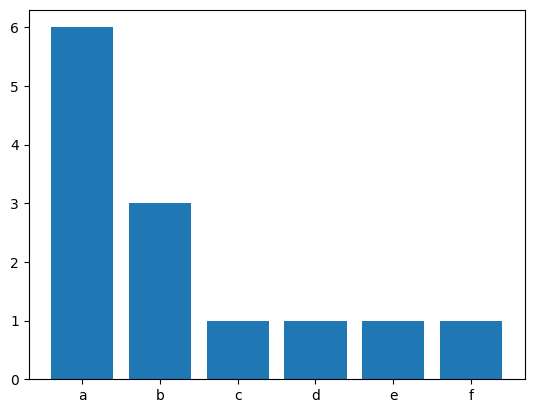

a ==> 0.46153846153846156
b ==> 0.23076923076923078
c ==> 0.07692307692307693
d ==> 0.07692307692307693
e ==> 0.07692307692307693
f ==> 0.07692307692307693


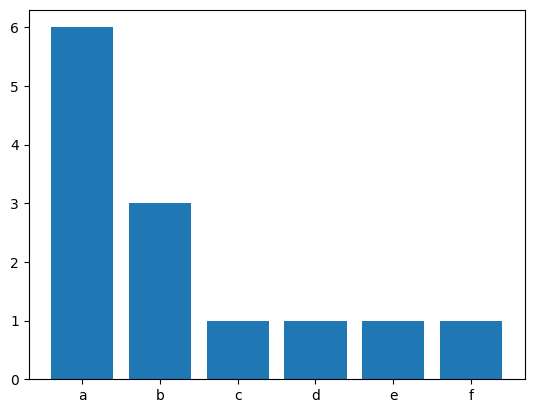

In [102]:
def un(y_data):
    import numpy as np
    import matplotlib.pyplot as plt
    uniqueData = np.unique(y_data, return_counts=True)
    print("데이터 단일값:",uniqueData[0])
    print("단일값대비 데이터:",uniqueData[1])
    plt.bar(uniqueData[0],uniqueData[1])
    plt.show(0)

    for x in range(len(uniqueData[0])):
        print(uniqueData[0][x],"==>",uniqueData[1][x]/np.sum(uniqueData[1]))

un(['a,b,a,b,a,b,a,a,c,a,d,e,f'.split(',')])


##### 훈련, 테스트 데이터 나누기 : 데이터 편향없이 잘 나눔, "훈련자료에는 모든 클레스가 다 있어야함"
### train_test_split()

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1,
                                                    random_state=777,
                                                    stratify=y_data)
np.unique(y_train, return_counts=True), np.unique(y_test,return_counts=True)

((array([0, 1]), array([4, 6], dtype=int64)),
 (array([0, 1]), array([1, 1], dtype=int64)))

데이터 단일값: [0 1]
단일값대비 데이터: [4 6]


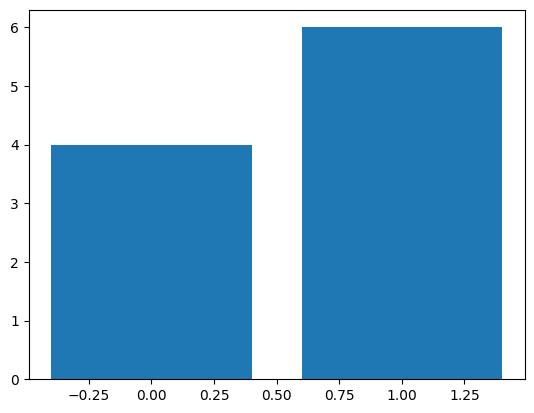

0 ==> 0.4
1 ==> 0.6


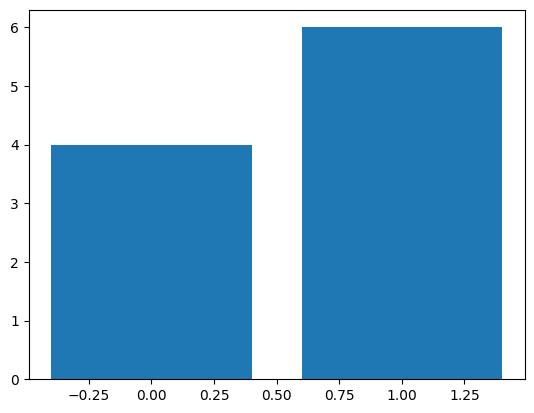

In [147]:
un(y_train)

In [146]:
model = LogisticRegression(penalty='none')
model.fit(x_train, y_train)
y_predict = model.predict(x_train)


# 내가 직접 만드는 score값
result = y_predict == y_train
np.unique(result, return_counts=True)

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([ True]), array([10], dtype=int64))

In [151]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Lasso
import numpy as np

##########데이터 로드

train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/regression/carprice_E1SUl6b.xlsx?raw=true', sheet_name='test')

##########데이터 분석

##########데이터 전처리

x_train = train_df.drop(['가격'], axis=1)
x_test = test_df.drop(['가격'], axis=1)
y_train = train_df['가격']
y_test = test_df['가격']


     년식   종류    연비   마력    토크   연료  하이브리드   배기량    중량 변속기
0  2015  준중형  11.8  172  21.0  가솔린      0  1999  1300  자동
1  2015  준중형  12.3  204  27.0  가솔린      0  1591  1300  자동
2  2015   소형  15.0  100  13.6  가솔린      0  1368  1035  수동
3  2014   소형  14.0  140  17.0  가솔린      0  1591  1090  자동
4  2015   대형   9.6  175  46.0   디젤      0  2497  1990  자동


In [150]:
x_train

,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...
66,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동
